In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
import keras

2024-01-18 13:10:13.755914: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
fashion_mnist=keras.datasets.fashion_mnist
(X_train_full,y_train_full) , (X_test,y_test) =fashion_mnist.load_data()

In [6]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt"
              ,"Sneaker","Bag","Ankle boot"]

## Data Reshape

In [7]:
X_train_full = X_train_full.reshape((60000 , 28,28,1))
X_test = X_test.reshape((10000,28,28,1))

### Data normalization

In [8]:
X_train_n = X_train_full / 255
X_test_n=X_test / 255

### Splitting data into train/validation/test

In [9]:
X_valid , X_train =X_train_n[:5000],X_train_n[5000:]
y_valid , y_train =y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

## Create the model architecture

In [10]:
np.random.seed(42)
tf.random.set_seed(42)

In [12]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='valid',activation='relu',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 300)               1622700   
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dense_2 (Dense)             (None, 10)                3010      
                                                        

In [14]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [16]:
model_history = model.fit(X_train,y_train,epochs=30, batch_size=64, validation_data=(X_valid,y_valid))

Epoch 1/30
860/860 [==============================] - 27s 31ms/step - loss: 0.3390 - accuracy: 0.8784 - val_loss: 0.3757 - val_accuracy: 0.8616
Epoch 2/30
860/860 [==============================] - 27s 31ms/step - loss: 0.3279 - accuracy: 0.8811 - val_loss: 0.3439 - val_accuracy: 0.8754
Epoch 3/30
860/860 [==============================] - 25s 29ms/step - loss: 0.3188 - accuracy: 0.8837 - val_loss: 0.6185 - val_accuracy: 0.7772
Epoch 4/30
860/860 [==============================] - 28s 32ms/step - loss: 0.3095 - accuracy: 0.8878 - val_loss: 0.3333 - val_accuracy: 0.8796
Epoch 5/30
860/860 [==============================] - 24s 28ms/step - loss: 0.3029 - accuracy: 0.8892 - val_loss: 0.3178 - val_accuracy: 0.8850
Epoch 6/30
860/860 [==============================] - 26s 30ms/step - loss: 0.2926 - accuracy: 0.8937 - val_loss: 0.3014 - val_accuracy: 0.8930
Epoch 7/30
860/860 [==============================] - 28s 32ms/step - loss: 0.2858 - accuracy: 0.8975 - val_loss: 0.3447 - val_accuracy:

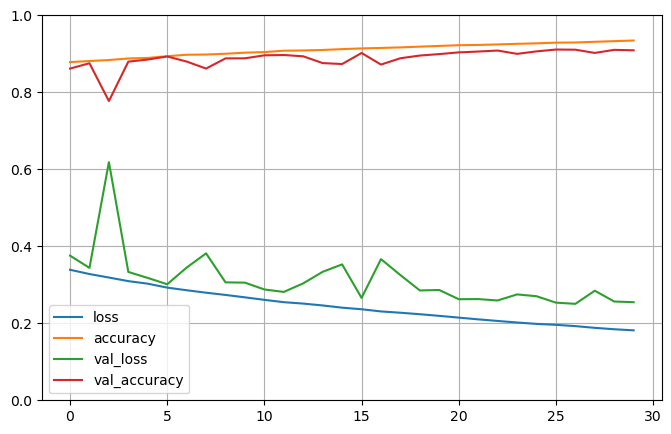

In [17]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [18]:
ev=model.evaluate(X_test_n,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2702 - accuracy: 0.9017


In [19]:
ev

[0.2701718509197235, 0.9017000198364258]

In [20]:
X_new=X_test[:3]

In [22]:
y_pred=model.predict(X_new)
y_pred

1/1 [==============================] - 0s 117ms/step


array([[4.7856302e-06, 1.5537200e-06, 8.0213349e-06, 6.0258285e-06,
        1.2931692e-05, 1.1481313e-03, 6.2289728e-06, 7.2138747e-03,
        4.2621186e-04, 9.9117225e-01],
       [3.8879789e-06, 2.1945855e-11, 9.9990416e-01, 8.5158280e-09,
        8.0578277e-05, 2.2524068e-12, 1.1376126e-05, 1.4077631e-12,
        6.4641133e-11, 6.0986990e-13],
       [1.1103448e-07, 9.9999893e-01, 1.4635615e-09, 7.2570185e-07,
        2.4433285e-07, 1.6888630e-09, 5.1749880e-09, 1.4648893e-11,
        6.8827716e-10, 2.7390555e-11]], dtype=float32)

In [23]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

AxesImage(size=(28, 28))


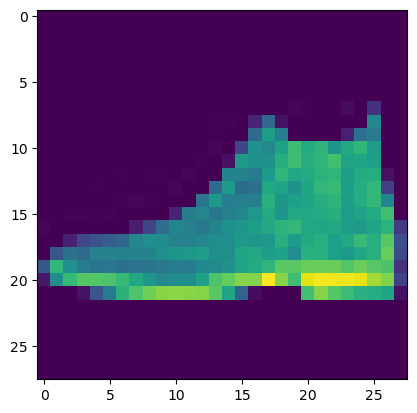

In [24]:
print(plt.imshow(X_test[0].reshape((28,28))))

In [25]:
keras.backend.clear_session

<function keras.src.backend.clear_session()>

In [26]:
del model

## Pooling vs No Pooling

In [27]:
model_a = keras.models.Sequential()
model_a.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='valid',activation='relu',input_shape=(28,28,1)))
model_a.add(keras.layers.MaxPooling2D((2,2)))
model_a.add(keras.layers.Flatten())
model_a.add(keras.layers.Dense(300, activation="relu"))
model_a.add(keras.layers.Dense(100, activation="relu"))
model_a.add(keras.layers.Dense(10, activation="softmax"))

model_b = keras.models.Sequential()
model_b.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1, padding='valid',activation='relu',input_shape=(28,28,1)))
model_b.add(keras.layers.Flatten())
model_b.add(keras.layers.Dense(300,activation="relu"))
model_b.add(keras.layers.Dense(100, activation="relu"))
model_b.add(keras.layers.Dense(10, activation="softmax"))

In [28]:
model_a.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 300)               1622700   
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                      

In [29]:
model_b.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 flatten_2 (Flatten)         (None, 21632)             0         
                                                                 
 dense_6 (Dense)             (None, 300)               6489900   
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 6521330 (24.88 MB)
Trainable params: 6521330 (24.88 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model_a.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [31]:
model_b.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [32]:
model_history_a=model_a.fit(X_train,y_train , epochs=3,batch_size=64,validation_data=(X_valid,y_valid))

Epoch 1/3
860/860 [==============================] - 25s 28ms/step - loss: 0.8965 - accuracy: 0.6939 - val_loss: 0.7422 - val_accuracy: 0.7394
Epoch 2/3
860/860 [==============================] - 23s 27ms/step - loss: 0.5361 - accuracy: 0.8061 - val_loss: 0.4942 - val_accuracy: 0.8158
Epoch 3/3
860/860 [==============================] - 24s 27ms/step - loss: 0.4780 - accuracy: 0.8283 - val_loss: 0.9643 - val_accuracy: 0.6948


In [34]:
model_history_b=model_b.fit(X_train , y_train ,epochs=3,batch_size=64,validation_data=(X_valid, y_valid))

Epoch 1/3
860/860 [==============================] - 55s 63ms/step - loss: 0.7297 - accuracy: 0.7477 - val_loss: 0.7116 - val_accuracy: 0.7394
Epoch 2/3
860/860 [==============================] - 46s 54ms/step - loss: 0.4889 - accuracy: 0.8230 - val_loss: 0.4586 - val_accuracy: 0.8286
Epoch 3/3
860/860 [==============================] - 44s 51ms/step - loss: 0.4372 - accuracy: 0.8423 - val_loss: 1.0184 - val_accuracy: 0.6936
